# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lucasshaiman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv("LCS.env")

True

In [7]:
# Create a newsapi client
# YOUR CODE HERE!

api_key = os.getenv("news_api_key")
newsapi = NewsApiClient(api_key=api_key)

In [8]:
type(api_key)

str

In [9]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
    
)

In [10]:
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 1470


In [11]:
bitcoin_headlines["articles"][0]

{'source': {'id': None, 'name': 'BeInCrypto'},
 'author': 'Nicholas Pongratz',
 'title': 'Bitcoin Mutual Fund Hits the Market as Crypto ETP Race Heats Up',
 'description': 'Maryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).',
 'url': 'https://beincrypto.com/bitcoin-mutual-fund-hits-the-market-as-crypto-etp-race-heats-up/',
 'urlToImage': 'https://assets.entrepreneur.com/providers/be-in-crypto/hero-image-be-in-crypto-378754.jpeg',
 'publishedAt': '2021-07-29T11:45:36Z',
 'content': 'This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).\r\nThe Bitcoin Strategy ProFund invests in b… [+1875 chars]'}

In [12]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

ethereum_headlines["articles"][0]

Total articles about Ethereum: 681


{'source': {'id': None, 'name': 'MarketBeat'},
 'author': 'Thomas Hughes',
 'title': 'Building A Quality Portfolio With Ethan Allen Interiors',
 'description': "It's no secret that we are fond of the furniture industry and Ethan Allen Interiors (NYSE: ETH) is part of this big picture. The company is a mostly N...",
 'url': 'https://www.marketbeat.com/originals/building-a-quality-portfolio-with-ethan-allen-interiors/?utm_source=entrepreneurcom&amp;amp;utm_medium=entrepreneurcom',
 'urlToImage': 'https://assets.entrepreneur.com/providers/marketbeat/hero-image-marketbeat-379835.jpeg',
 'publishedAt': '2021-08-10T12:10:00Z',
 'content': "August\r\n10, 2021\r\n4 min read\r\nThis story originally appeared on MarketBeatEthan Allen Interiors Is A Must-Buy For Dividend Growth Investors\r\nIt's no secret that we are fond of the furniture industry … [+4048 chars]"}

In [13]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(bitcoin_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.340,0.079,0.000,0.921
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.340,0.000,0.066,0.934
2,2021-08-21,"August\r\n21, 2021\r\n2 min read\r\nThis story...",0.296,0.066,0.000,0.934
3,2021-07-29,Bitcoin has climbed sharply in recent days.\r\...,0.340,0.066,0.000,0.934
4,2021-07-29,This article was translated from our Spanish e...,-0.340,0.000,0.070,0.930


In [14]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(ethereum_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-10,"August\r\n10, 2021\r\n4 min read\r\nThis story...",0.5106,0.150,0.060,0.790
1,2021-08-19,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,0.0000,0.000,0.000,1.000
2,2021-08-18,Argus is a transparent system built on the Eth...,0.0000,0.000,0.000,1.000
3,2021-08-16,Jakub Porzycki/NurPhoto via Getty Images\r\nTr...,-0.1531,0.000,0.048,0.952
4,2021-08-18,The anonymous developer behind EtherRock is st...,0.3182,0.071,0.000,0.929


In [15]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.217877,0.075880,0.019840,0.904240
std,0.389758,0.078685,0.039485,0.080536
min,-0.757900,0.000000,0.000000,0.631000
25%,0.000000,0.000000,0.000000,0.847750
50%,0.202300,0.066000,0.000000,0.913000
75%,0.530600,0.106250,0.000000,1.000000
max,0.921700,0.369000,0.175000,1.000000


In [16]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.164474,0.067760,0.030500,0.901770
std,0.381000,0.072778,0.043647,0.077075
min,-0.757900,0.000000,0.000000,0.697000
25%,-0.038650,0.000000,0.000000,0.850500
50%,0.012000,0.059500,0.000000,0.917000
75%,0.481000,0.114500,0.056250,0.953500
max,0.901300,0.303000,0.173000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [53]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucasshaiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')


# Expand the default stopwords list if necessary
# YOUR CODE HERE!
#sw_addon = {'said', 'mln', 'kilolitres','kl','u','it',"'s","n't",'...',"\'"}
#second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [58]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [59]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

#btc_df["tokens"] = btc_df['text'].apply(tokenizer)


#btc_df["tokens"] = for row in btc_df["text"]:
#tokenize(text) in btc_df["text"]


btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.340,0.079,0.000,0.921,"[story, originally, appeared, cryptoMaryland-b..."
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.340,0.000,0.066,0.934,"[August, 6, 2021, 3, min, read, article, trans..."
2,2021-08-21,"August\r\n21, 2021\r\n2 min read\r\nThis story...",0.296,0.066,0.000,0.934,"[August, 21, 2021, 2, min, read, story, origin..."
3,2021-07-29,Bitcoin has climbed sharply in recent days.\r\...,0.340,0.066,0.000,0.934,"[Bitcoin, climbed, sharply, recent, day, REUTE..."
4,2021-07-29,This article was translated from our Spanish e...,-0.340,0.000,0.070,0.930,"[article, translated, Spanish, edition, using,..."


In [60]:
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.340,0.079,0.000,0.921,"[story, originally, appeared, cryptoMaryland-b..."
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.340,0.000,0.066,0.934,"[August, 6, 2021, 3, min, read, article, trans..."
2,2021-08-21,"August\r\n21, 2021\r\n2 min read\r\nThis story...",0.296,0.066,0.000,0.934,"[August, 21, 2021, 2, min, read, story, origin..."
3,2021-07-29,Bitcoin has climbed sharply in recent days.\r\...,0.340,0.066,0.000,0.934,"[Bitcoin, climbed, sharply, recent, day, REUTE..."
4,2021-07-29,This article was translated from our Spanish e...,-0.340,0.000,0.070,0.930,"[article, translated, Spanish, edition, using,..."


In [61]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_df["tokens"] = eth_df["text"].apply(tokenizer)


#eth_tokens = []

#for index, row in eth_df.itterows():
 #   tokens = tokenizer(row["text"])
 #   eth_tokens.append(tokens)
    
#eth_df["tokens"] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-10,"August\r\n10, 2021\r\n4 min read\r\nThis story...",0.5106,0.150,0.060,0.790,"[August, 10, 2021, 4, min, read, story, origin..."
1,2021-08-19,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,0.0000,0.000,0.000,1.000,"[Vitalik, Buterin, John, Phillips/, Getty, ima..."
2,2021-08-18,Argus is a transparent system built on the Eth...,0.0000,0.000,0.000,1.000,"[Argus, transparent, system, built, Ethereum, ..."
3,2021-08-16,Jakub Porzycki/NurPhoto via Getty Images\r\nTr...,-0.1531,0.000,0.048,0.952,"[Jakub, Porzycki/NurPhoto, via, Getty, Images,..."
4,2021-08-18,The anonymous developer behind EtherRock is st...,0.3182,0.071,0.000,0.929,"[anonymous, developer, behind, EtherRock, stil..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [62]:
from collections import Counter
from nltk import ngrams

In [63]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

N = 2

grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Bitcoin'), 12),
 (('char', 'August'), 7),
 (('Getty', 'Images'), 7),
 (('story', 'originally'), 6),
 (('originally', 'appeared'), 6),
 (('min', 'read'), 6),
 (('Bitcoin', 'BTC'), 5),
 (('via', 'Getty'), 5),
 (('bitcoin', 'BTC'), 4),
 (('read', 'story'), 4),
 (('U.S.', 'Securities'), 4),
 (('Securities', 'Exchange'), 4),
 (('Exchange', 'Commission'), 4),
 (('Bitcoin', 'CRYPTO'), 4),
 (('CRYPTO', 'BTC'), 4),
 (('char', 'recent'), 4),
 (('char', 'BeInCrypto'), 4),
 (('Commission', 'SEC'), 3),
 (('Images', 'Bitcoin'), 3),
 (('moving', 'average'), 3)]

In [64]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

N = 2

grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('hard', 'fork'), 14),
 (('London', 'hard'), 12),
 (('Ether', 'ETH'), 8),
 (('char', 'Ethereum'), 7),
 (('went', 'live'), 7),
 (('London', 'upgrade'), 7),
 (('largest', 'cryptocurrency'), 6),
 (('char', 'BeInCrypto'), 6),
 (('CRYPTO', 'ETH'), 5),
 (('char', 'Ether'), 5),
 (('cryptocurrency', 'market'), 5),
 (('min', 'read'), 4),
 (('read', 'story'), 4),
 (('story', 'originally'), 4),
 (('originally', 'appeared'), 4),
 (('Vitalik', 'Buterin'), 4),
 (('Ethereum', 'blockchain'), 4),
 (('non-fungible', 'token'), 4),
 (('Ethereum', 'whale'), 4),
 (('Ethereum', 'CRYPTO'), 4)]

In [70]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [71]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 100),
 ('Bitcoin', 62),
 ('bitcoin', 38),
 ('BTC', 22),
 ('market', 15),
 ('price', 14),
 ('2021', 13),
 ('cryptocurrency', 13),
 ('’', 13),
 ('trading', 13)]

In [72]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 100),
 ('Ethereum', 46),
 ('ETH', 26),
 ('London', 23),
 ('cryptocurrency', 22),
 ('crypto', 18),
 ('market', 15),
 ('Bitcoin', 15),
 ('hard', 15),
 ('2021', 14)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [83]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=400, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 20, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()


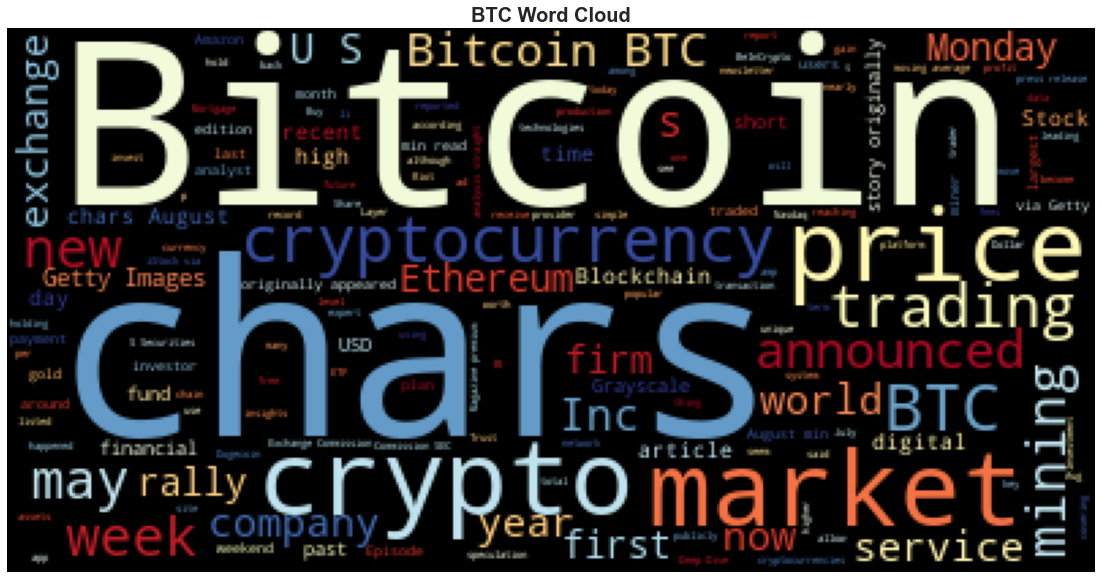

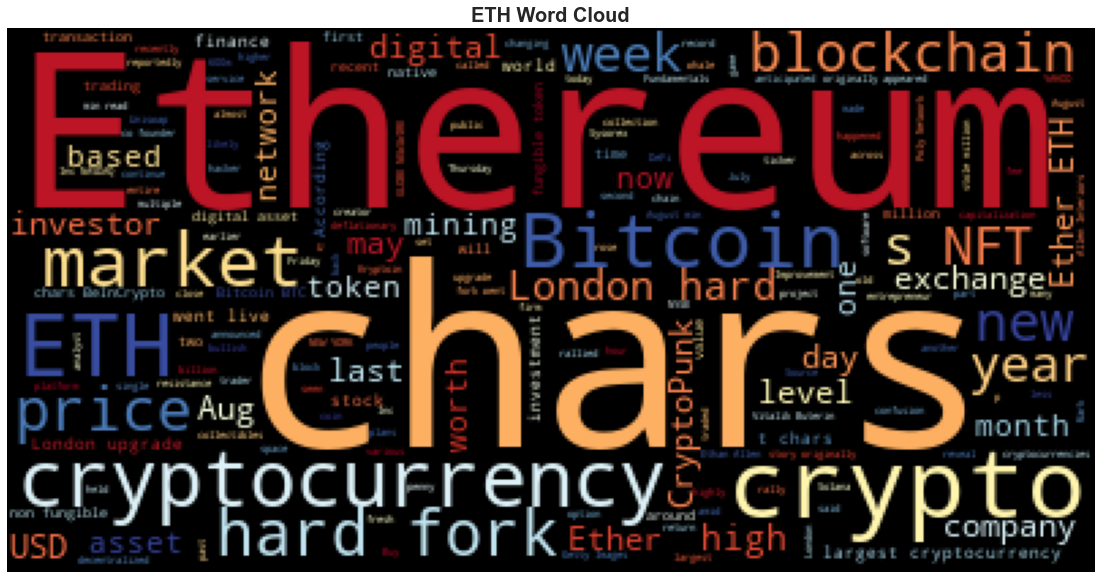

In [85]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(btc_df.text.str.cat(), title="BTC Word Cloud")
wordcloud(eth_df.text.str.cat(), title="ETH Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [86]:
import spacy
from spacy import displacy

In [87]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [88]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [90]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

all_btc_text = btc_df.text.str.cat()
all_btc_text

'This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).\r\nThe Bitcoin Strategy ProFund invests in b… [+1875 chars]August\r\n6, 2021\r\n3 min read\r\nThis article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nCriptomonedas the boom in the last year and a half has … [+2473 chars]August\r\n21, 2021\r\n2 min read\r\nThis story originally appeared on be[IN]cryptoThe U.S. Securities and Exchange Commission (SEC) has concluded its judgement on three key individuals tied to the now defu… [+2113 chars]Bitcoin has climbed sharply in recent days.\r\nREUTERS/Dado Ruvic\r\nBitcoin is facing a "do-or-die" moment and could move sharply higher if it can hold on to the stellar weekly gains that have taken it … [+2315 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nOpinio

In [91]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"

In [92]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [93]:
# List all Entities
# YOUR CODE HERE!

for ent in doc.ents:
    print(ent.text, ent.label_)

be[IN]cryptoMaryland ORG
ProFunds ORG
6, 2021 DATE
Spanish NORP
AI ORG
the last year and a half DATE
21, 2021 DATE
be[IN]cryptoThe U.S. Securities and Exchange Commission ORG
SEC ORG
three CARDINAL
recent days DATE
Dado Ruvic ORG
Bitcoin PERSON
weekly DATE
Spanish NORP
AI ORG
Entrepreneur ORG
18, 2021 DATE
Entrepreneur ORG
Earlier this year DATE
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost These Penny Stocks ORG
Bitcoin, Dogecoin ORG
Ethereum ORG
9, 2021 DATE
1 CARDINAL
above $50,000 MONEY
the weekend DATE
Kevin PERSON
259684 DATE
3000 MONEY
yesterday DATE
Monday DATE
Amazon.com Inc. ORG
23, 2021 DATE
Securit PERSON
this year DATE
just a few months DATE
The Pirate Bay ORG
first ORDINAL
a day DATE
5.5 CARDINAL
Gary Gensler PERSON
the U.S. Securities and Exchange Commission ORG
BTCUSD PERSON
+0.06% PERCENT
Antinalys PERSON
12th century DATE
S3studio GPE
Getty Images PERSON
Bitcoin PERSON
200-day DATE
44,847 CARDINAL
Sunday, Aug. 8 DATE
weekly DATE
BTC ORG
the week of Aug. 1 

---

### Ethereum NER

In [95]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

all_eth_text = eth_df.text.str.cat()
all_eth_text

'August\r\n10, 2021\r\n4 min read\r\nThis story originally appeared on MarketBeatEthan Allen Interiors Is A Must-Buy For Dividend Growth Investors\r\nIt\'s no secret that we are fond of the furniture industry … [+4048 chars]Vitalik Buterin.\r\nJohn Phillips/ Getty images\r\nEthereum co-creator Vitalik Buterin poked holes on Thursday in Jack Dorsey and Mark Zuckerberg\'s attempts to break digital-asset ground for their compan… [+2573 chars]Argus is a transparent system built on the Ethereum blockchain that allows people to anonymously report piracy in exchange for a bounty. Pirated content is traced back to the source through a unique … [+1638 chars]Jakub Porzycki/NurPhoto via Getty Images\r\nTrade volumes on NFT marketplace OpenSea have soared in the last month as the craze for non-fungible tokens continues. \r\nOpenSea has done $1.22 billion (or 3… [+1112 chars]The anonymous developer behind EtherRock is still actively maintaining the project. "I was a complete amateur when I built it

In [96]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [97]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent', jupyter=True)

In [98]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)


10, 2021 DATE
Dividend Growth Investors ORG
Buterin PRODUCT
John Phillips/ Getty PERSON
Vitalik Buterin PERSON
Thursday DATE
Jack Dorsey PERSON
Mark Zuckerberg's PERSON
Ethereum ORG
Porzycki/NurPhoto ORG
Getty Images
Trade ORG
NFT ORG
OpenSea ORG
the last month DATE
OpenSea PERSON
$1.22 billion MONEY
3 CARDINAL
EtherRock ORG
Motherboard PERSON
Non-Fungible Tokens ORG
$22.25 billion MONEY
weekend DATE
CryptoPunks ORG
$6 million MONEY
CryptoPunks PRODUCT
more than one percent PERCENT
CryptoPunks PRODUCT
9, 2021 DATE
1 CARDINAL
Allen Interiors PERSON
American NORP
Research Asia LOC
Alibaba Group ORG
Carnegie Mellon University ORG
Spanish NORP
AI ORG
Entrepreneur ORG
chars]August
 CARDINAL
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost These Penny Stocks ORG
Bitcoin, Dogecoin ORG
Ethereum ORG
Chinese NORP
600 MONEY
Chinese NORP
600 MONEY
first ORDINAL
Ethereum ORG
International Friendship Day EVENT
July 30 DATE
NFT ORG
NFT ORG
$1.1 billion MONEY
NFT ORG
Fili PERSON
$600 million 

---